# Final Project

### Data Collection
Data Sources:
1. Yahoo Finance Library
    
    Collected from yfinance library
    
    Stock Market Indicators Data


2. Federal Reserve Economic Data
    
    Collected using Api Key from https://fred.stlouisfed.org/docs/api/fred/
    
    Interest Rate Data

In [4]:
import yfinance as yf  ## Importing Stock Data From Yahoo Finance
aapl = yf.download(tickers='AAPL', period='1000d', interval='1d',inplace=True)  # Apple
google  = yf.download(tickers='GOOG',  period='1000d', interval='1d',inplace=True)  # Google
amazon  = yf.download(tickers='AMZN',  period='1000d', interval='1d',inplace=True)  # Amazon
tesla  = yf.download(tickers='TSLA',  period='1000d', interval='1d',inplace=True) #TESLA

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
from fredapi import Fred     ## Importing Data From Fred
fred = Fred(api_key='0e8891afccdf0b465cf8915bc862e116')
data = fred.get_series('DFF')

In [6]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['IR']
df = df.reset_index()
df = df.rename(columns={'index':'Date'})

In [7]:
data1 = data.iloc[24650:24971]

In [8]:
result = pd.merge(aapl, google, on="Date")
result = result.drop(columns={'Open_x','High_x','Low_x','Open_y','High_y','Low_y','Close_x','Close_y'})
result = result.rename(columns={'Adj Close_x': 'Apple_Closing','Adj Close_y':'Google_Closing',
                        'Volume_x':'Apple_Volume','Volume_y':'Google_Volume'})

In [9]:
output = pd.merge(result,amazon, on = "Date")
output_th = pd.merge(output, tesla , on = "Date")

In [10]:
output_th = output_th.drop(columns={'Open_x','High_x','Low_x','Open_y','High_y','Low_y','Close_x','Close_y'})
output_th = output_th.rename(columns={'Adj Close_x': 'Amazon_Closing','Adj Close_y':'Tesla_Closing',
                            'Volume_x':'Amazon_Volume','Volume_y':'Tesla_Volume'})

In [11]:
final = pd.merge(output_th, df , on = "Date")

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure


In [13]:
final = final.set_index('Date')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


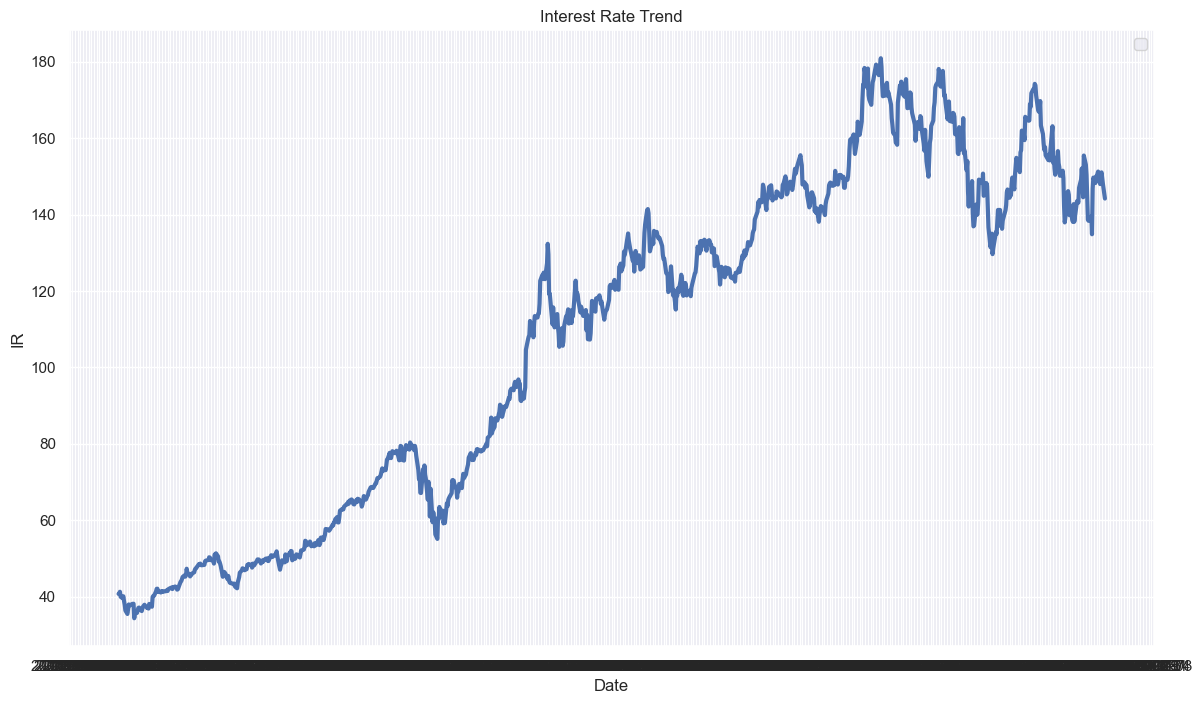

In [78]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.lineplot(data=final, x='Date', y = 'Apple_Closing', palette='viridis',lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('IR')
plt.title('Interest Rate Trend')
plt.xlabel('Date')
plt.show()

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

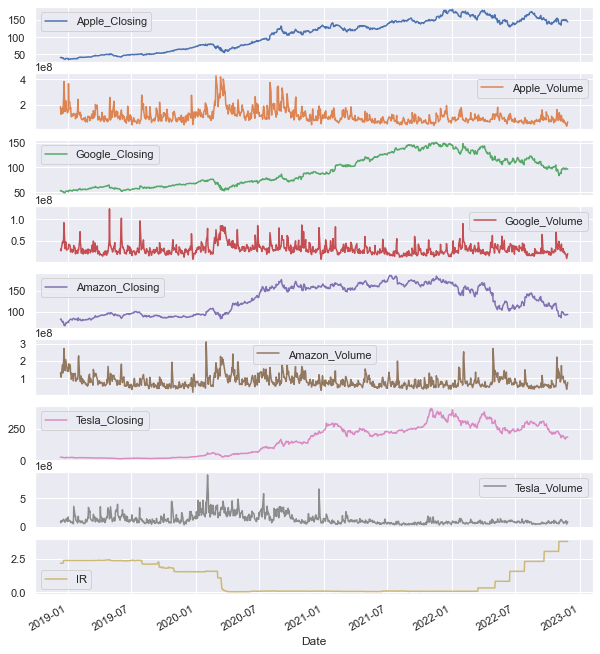

In [14]:
final.plot(subplots=True, figsize=(10, 12))

In [15]:
final1 = final.iloc[:,0:8]/10
final1

,Apple_Closing,Apple_Volume,Google_Closing,Google_Volume,Amazon_Closing,Amazon_Volume,Tesla_Closing,Tesla_Volume
Date,,,,,,,,
2018-12-11,4.068940,18912680.0,5.25875,2789400.0,8.21620,12489400.0,2.445067,9463200.0
2018-12-12,4.080280,14251080.0,5.31840,3047600.0,8.31770,13196000.0,2.444000,7540500.0
2018-12-13,4.124920,12759440.0,5.30950,2659600.0,8.29190,10542600.0,2.511933,11048850.0
2018-12-14,3.992932,16281480.0,5.21050,3373200.0,7.95955,12734400.0,2.438067,9506400.0
2018-12-17,3.955772,17715160.0,5.08265,4770800.0,7.60455,17659600.0,2.322800,11511000.0
...,...,...,...,...,...,...,...,...
2022-11-21,14.800999,5872410.0,9.58300,1869690.0,9.24600,8433030.0,16.787000,9288270.0
2022-11-22,15.017999,5180410.0,9.73300,1886890.0,9.32000,6219200.0,16.991000,7845230.0
2022-11-23,15.107001,5830140.0,9.88200,1756890.0,9.41300,5941470.0,18.320000,10953670.0


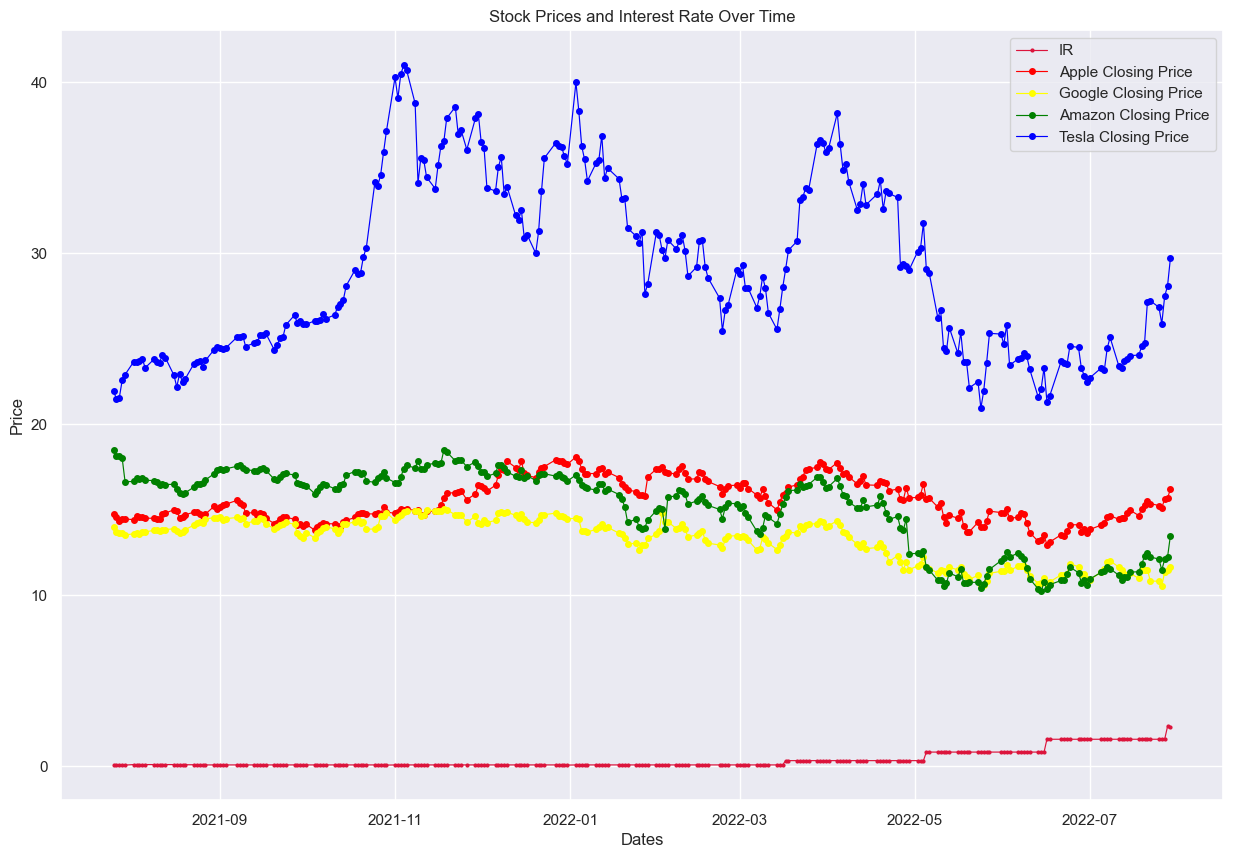

In [71]:
start, end = '2021-07-25', '2022-07-29'

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(final.loc[start:end, 'IR'], marker='.', markersize=4, linestyle='-', linewidth = 0.85, label='IR', color='crimson')
ax.plot(final1.loc[start:end, 'Apple_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Apple Closing Price', color='red')
ax.plot(final1.loc[start:end, 'Google_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Google Closing Price', color='yellow')
ax.plot(final1.loc[start:end, 'Amazon_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Amazon Closing Price', color='green')
ax.plot(final1.loc[start:end, 'Tesla_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Tesla Closing Price', color='blue')


ax.set_ylabel("Price")
ax.set_xlabel("Dates")
ax.set_title("Stock Prices and Interest Rate Over Time")
ax.legend()

In [17]:
import warnings
warnings.filterwarnings("ignore")
import cufflinks as cf

cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

In [68]:
final[['Google_Closing','Apple_Closing','Amazon_Closing','Tesla_Closing','IR']].iplot(title='Closing Price of Stocks Over Time', xTitle='Dates',yTitle='Closing Price', fill=True,colors=['blue','lightgreen','yellow','lightblue','red'])


In [66]:
# final['Google_Closing'].iplot(title='MSFT Adjusted Close',bestfit=True, bestfit_colors=['blue'])
# import statsmodels.api as sm
qf=cf.QuantFig(tesla,title='Apple Stocks Closing Price Over Time',yTitle='Closing Price',xTitle='Dates')
qf.add_sma([10,30],width=2,color=['blue','lightblue'])
qf.add_bollinger_bands()
qf.add_volume()
qf.iplot()

In [50]:
final['IR'].iplot(title='Trends in Interest Rate', xTitle='Dates',yTitle='Interest Rate')

In [64]:
final[['Apple_Closing', 'Google_Closing','Tesla_Closing','Amazon_Closing','IR']].iplot(title='Trends in Stocks Closing Price Over Time', xTitle='Dates',yTitle='Closing Price',colors=['lightpurple','lightgreen','lightpink','lightblue','red'])


In [63]:
final[['Apple_Volume', 'Google_Volume','Tesla_Volume','Amazon_Volume']].iplot(title='Trends in Volumes of Stocks over time', xTitle='Dates',yTitle='Stock Volume',colors=['green','purple','red','blue'])
